# Intermidiate level task- Exploratory Data Analysis on Terrorism

## Problem Statement- As a security/defense analyst, try to find out the hot zone of terrorism

### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Importing the data

In [2]:
df = pd.read_csv("globalterrorismdb_0718dist.csv",encoding='Ansi')

### Data Preview

In [3]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


#### Checking missing values

In [4]:
df.isnull()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,False,False,False,False,False,True
1,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,False,False,False,False,False,True
2,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,False,False,False,False,False,True
3,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,False,False,False,False,False,True
4,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,False,False,False,False,True,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,True
181687,False,False,False,False,True,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,True
181688,False,False,False,False,True,False,True,False,False,False,...,True,False,True,True,False,False,False,False,False,True
181689,False,False,False,False,True,False,True,False,False,False,...,True,False,True,True,False,False,False,False,False,True


#### Dropping columns with more than 70% missing values

In [5]:
df.dropna(axis=1,thresh=len(df)*0.7,inplace=True)

In [6]:
df

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,weapsubtype1_txt,nkill,nwound,property,ishostkid,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,...,NaN,1.0,0.0,0,0.0,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,...,NaN,0.0,0.0,0,1.0,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,...,NaN,1.0,0.0,0,0.0,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,...,Unknown Explosive Type,NaN,NaN,1,0.0,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,...,NaN,NaN,NaN,1,0.0,PGIS,-9,-9,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,0,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,...,Unknown Gun Type,1.0,2.0,-9,0.0,START Primary Collection,0,0,0,0
181687,201712310029,2017,12,31,0,200,Syria,10,Middle East & North Africa,Lattakia,...,"Projectile (rockets, mortars, RPGs, etc.)",2.0,7.0,1,0.0,START Primary Collection,-9,-9,1,1
181688,201712310030,2017,12,31,0,160,Philippines,5,Southeast Asia,Maguindanao,...,Arson/Fire,0.0,0.0,1,0.0,START Primary Collection,0,0,0,0
181689,201712310031,2017,12,31,0,92,India,6,South Asia,Manipur,...,Grenade,0.0,0.0,-9,0.0,START Primary Collection,-9,-9,0,-9


#### Renaming the columns

In [7]:
df.rename(columns={'eventid':'Event_ID','iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':
                   'state','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':
                   'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type',
                    'motive':'Motive','success':'Success'},inplace=True)

In [8]:
df.head()

,Event_ID,Year,Month,Day,extended,country,Country,region,Region,state,...,weapsubtype1_txt,Killed,Wounded,property,ishostkid,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,...,NaN,1.0,0.0,0,0.0,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,...,NaN,0.0,0.0,0,1.0,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,...,NaN,1.0,0.0,0,0.0,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,...,Unknown Explosive Type,NaN,NaN,1,0.0,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,...,NaN,NaN,NaN,1,0.0,PGIS,-9,-9,1,1


#### Finding out all unique countries and years of terrorist attacks

In [9]:
df['Year'].unique()

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1986, 1982, 1983, 1984, 1985, 1987, 1988, 1989, 1990, 1991,
       1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017], dtype=int64)

In [10]:
df['Country'].unique()

array(['Dominican Republic', 'Mexico', 'Philippines', 'Greece', 'Japan',
       'United States', 'Uruguay', 'Italy', 'East Germany (GDR)',
       'Ethiopia', 'Guatemala', 'Venezuela', 'West Germany (FRG)',
       'Switzerland', 'Jordan', 'Spain', 'Brazil', 'Egypt', 'Argentina',
       'Lebanon', 'Ireland', 'Turkey', 'Paraguay', 'Iran',
       'United Kingdom', 'Colombia', 'Bolivia', 'Nicaragua',
       'Netherlands', 'Belgium', 'Canada', 'Australia', 'Pakistan',
       'Zambia', 'Sweden', 'Costa Rica', 'South Yemen', 'Cambodia',
       'Israel', 'Poland', 'Taiwan', 'Panama', 'Kuwait',
       'West Bank and Gaza Strip', 'Austria', 'Czechoslovakia', 'India',
       'France', 'South Vietnam', 'Brunei', 'Zaire',
       "People's Republic of the Congo", 'Portugal', 'Algeria',
       'El Salvador', 'Thailand', 'Haiti', 'Sudan', 'Morocco', 'Cyprus',
       'Myanmar', 'Afghanistan', 'Peru', 'Chile', 'Honduras',
       'Yugoslavia', 'Ecuador', 'New Zealand', 'Malaysia', 'Singapore',
       'Bot

#### Seperating the important features needed to solve the problem
* The given dataset contains a lot of features which are not related to our problem statement.
* We will be seperating important features which we need to solve the problem.
* <b> Following features seem important to solve the problem:

In [11]:
df = df[['Event_ID','Year','Month','Day','Country','Region','state','latitude','longitude','Success','suicide',
         'AttackType','Target_type','Target','Killed','Wounded',
         'city','Weapon_type','Group']]

In [12]:
df.head()

,Event_ID,Year,Month,Day,Country,Region,state,latitude,longitude,Success,suicide,AttackType,Target_type,Target,Killed,Wounded,city,Weapon_type,Group
0,197000000001,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,18.456792,-69.951164,1,0,Assassination,Private Citizens & Property,Julio Guzman,1.0,0.0,Santo Domingo,Unknown,MANO-D
1,197000000002,1970,0,0,Mexico,North America,Federal,19.371887,-99.086624,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),"Nadine Chaval, daughter",0.0,0.0,Mexico city,Unknown,23rd of September Communist League
2,197001000001,1970,1,0,Philippines,Southeast Asia,Tarlac,15.478598,120.599741,1,0,Assassination,Journalists & Media,Employee,1.0,0.0,Unknown,Unknown,Unknown
3,197001000002,1970,1,0,Greece,Western Europe,Attica,37.997490,23.762728,1,0,Bombing/Explosion,Government (Diplomatic),U.S. Embassy,NaN,NaN,Athens,Explosives,Unknown
4,197001000003,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,1,0,Facility/Infrastructure Attack,Government (Diplomatic),U.S. Consulate,NaN,NaN,Fukouka,Incendiary,Unknown


In [13]:
df.describe()

,Event_ID,Year,Month,Day,latitude,longitude,Success,suicide,Killed,Wounded
count,1.816910e+05,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,171378.000000,165380.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,0.889598,0.036507,2.403272,3.167668
std,1.325957e+09,13.259430,3.388303,8.814045,18.569242,2.047790e+05,0.313391,0.187549,11.545741,35.949392
min,1.970000e+11,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000,0.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,1.000000,0.000000,0.000000,0.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,1.000000,0.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,1.000000,0.000000,2.000000,2.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1.000000,1.000000,1570.000000,8191.000000


#### Observations
1. The data consists of terrorist activities ranging from the year: 1970 to 2017
2. Maximum number of people killed in an event were: 1570
3. Maximum number of people wounded in an event were: 8191

### Data Visualization

#### Finding out correlation
* Correlation is a relationship between two independent variables ranging from -1 to +1, -1 being the strong negative relationship and +1 being the strong positive relationship.
* By analyzing the correlationship here, we can solve the problrm of multicolinearity.
* <b> The correlation is in between numeric data only.

In [14]:
df.corr()

,Event_ID,Year,Month,Day,latitude,longitude,Success,suicide,Killed,Wounded
Event_ID,1.000000,0.999996,0.002706,0.018336,0.166886,0.003907,-0.082972,0.137743,0.015351,0.015282
Year,0.999996,1.000000,0.000139,0.018254,0.166933,0.003917,-0.082963,0.137736,0.015341,0.015273
Month,0.002706,0.000139,1.000000,0.005497,-0.015978,-0.003880,-0.002845,0.003071,0.003463,0.002938
Day,0.018336,0.018254,0.005497,1.000000,0.003423,-0.002285,-0.011802,0.003593,-0.003693,-0.001268
latitude,0.166886,0.166933,-0.015978,0.003423,1.000000,0.001463,-0.073715,0.068682,-0.018124,0.015988
longitude,0.003907,0.003917,-0.003880,-0.002285,0.001463,1.000000,-0.000858,0.000486,-0.000562,0.000223
Success,-0.082972,-0.082963,-0.002845,-0.011802,-0.073715,-0.000858,1.000000,-0.031155,0.053115,0.025804
suicide,0.137743,0.137736,0.003071,0.003593,0.068682,0.000486,-0.031155,1.000000,0.136086,0.099525
Killed,0.015351,0.015341,0.003463,-0.003693,-0.018124,-0.000562,0.053115,0.136086,1.000000,0.534375
Wounded,0.015282,0.015273,0.002938,-0.001268,0.015988,0.000223,0.025804,0.099525,0.534375,1.000000


<b> Let us plot the correlation matrix

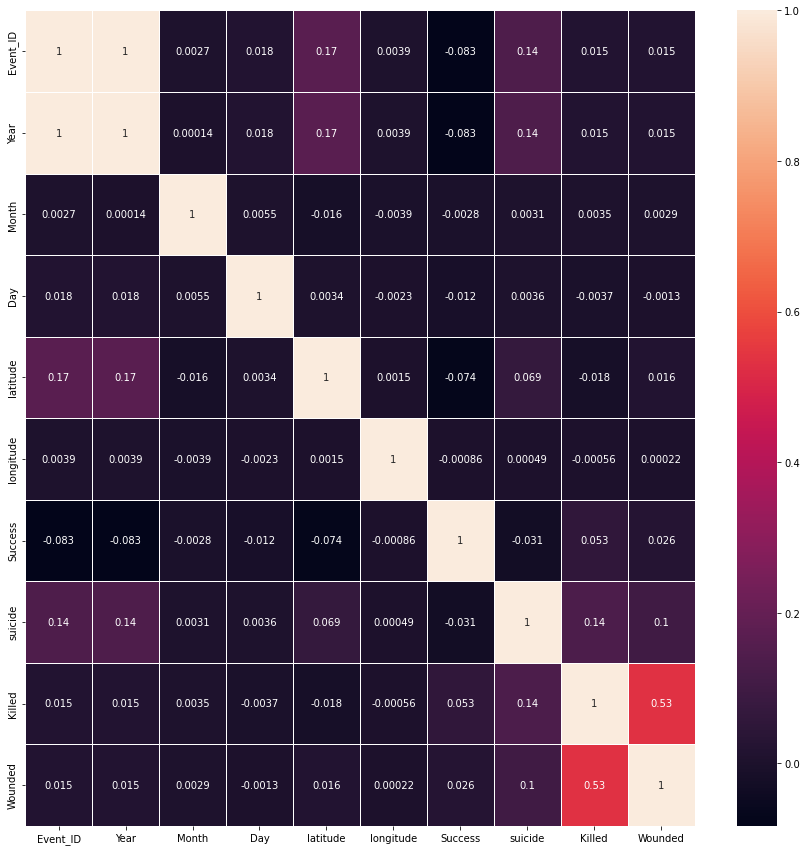

In [15]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),linewidths=0.5,annot=True)
plt.show()

* <b> As we can see, no correlation between two variables exceeds 90%. Thus we won't have to face the problem of multicolinearity.
* <b> We need not to worry about colinearity in this problem as we are not predicting anything through machine learning model. We are just analyzing the data and drawing the conclusion.  

#### Year-wise attacks

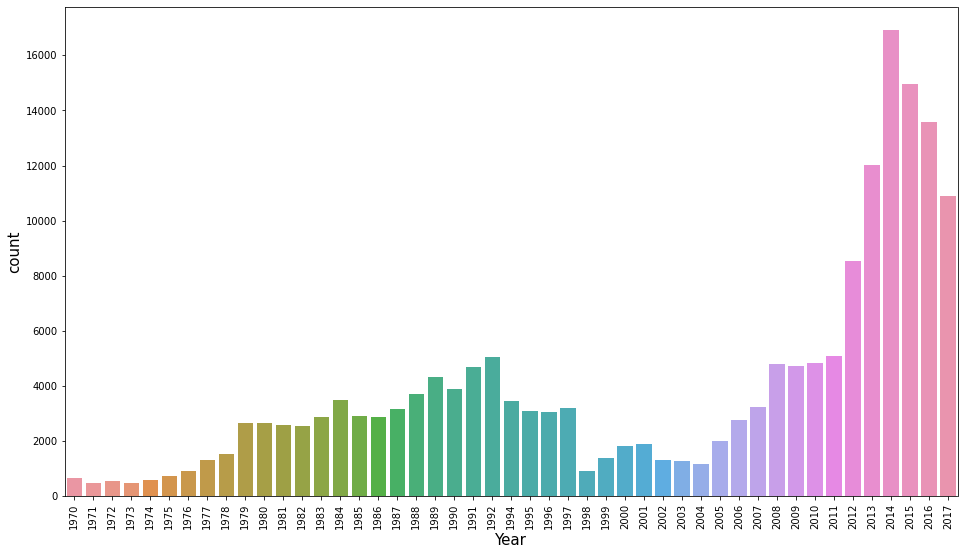

In [16]:
plt.figure(figsize=(16,9))
plt.xlabel("Year",size=15)
plt.ylabel("Count",size=15)
plt.xticks(rotation=90)
sns.countplot(x="Year",data=df)
plt.show()

<b> As we can see, the maximum number of attacks took place in year 2014, followed by 2015 and least took place in year 1971

#### Region-wise attacks

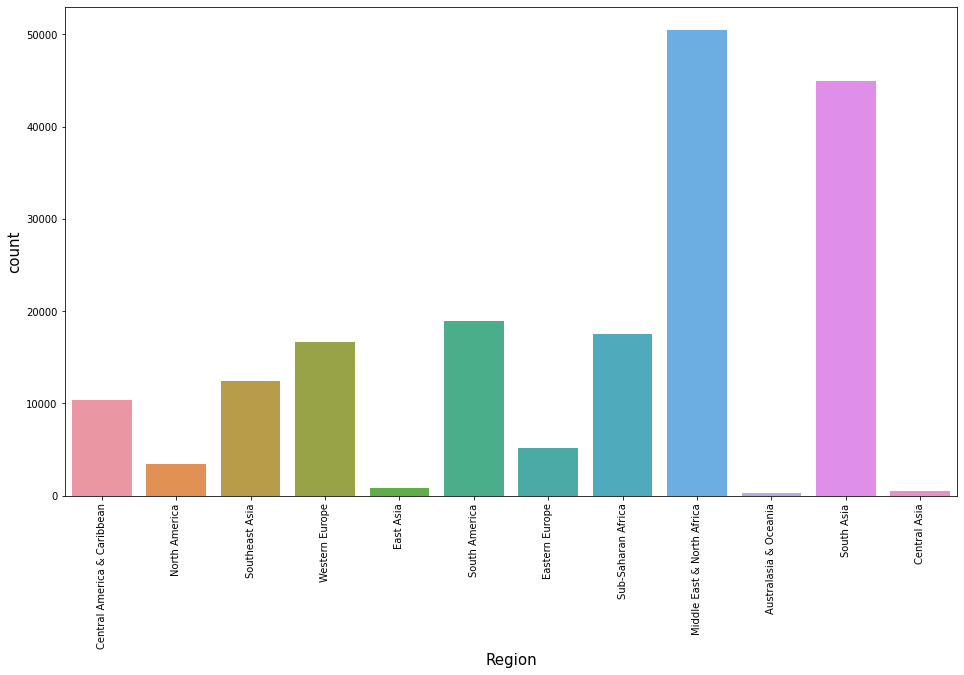

In [17]:
plt.figure(figsize=(16,9))
plt.xlabel("Region",size=15)
plt.ylabel("Count",size=15)
plt.xticks(rotation=90)
sns.countplot(x="Region",data=df)
plt.show()

<b> As we can see, the maximum number of attacks took place in Middle East and North Africa, followed by South Asia and least took place in Australasia and Oceania. 

#### Country-wise attacks(Top 10 and bottom 5 Countries)

In [18]:
df_countries =df["Country"].value_counts().drop(df["Country"].value_counts().index[11:-6])

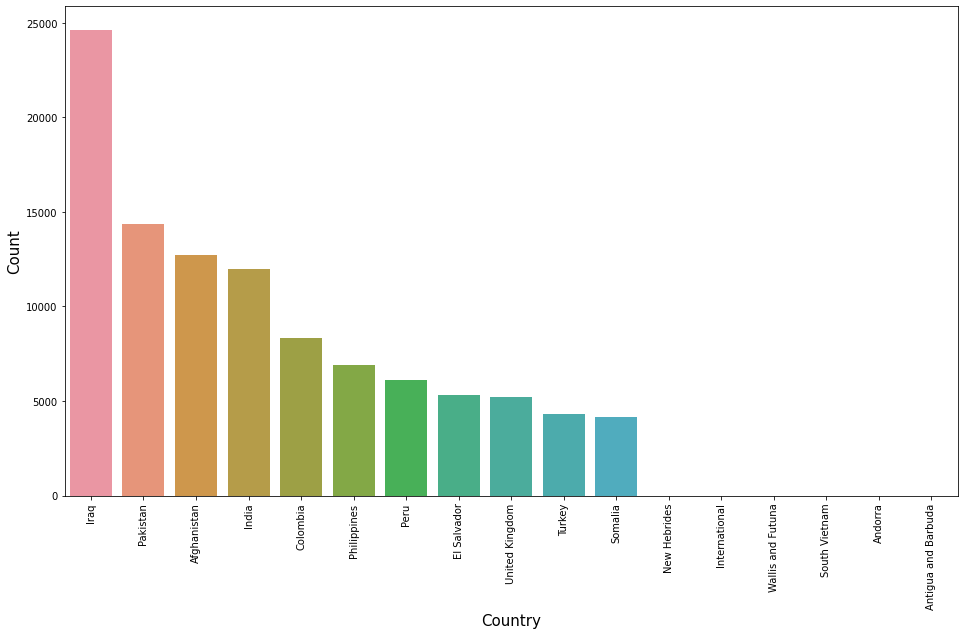

In [19]:
plt.figure(figsize=(16,9))
X = df_countries.index
y = df_countries.values
sns.barplot(X,y)
plt.xlabel("Country",size=15)
plt.ylabel("Count",size=15)
plt.xticks(rotation=90)
plt.show()

<b> As we can see, the maximum number of attacks took place in Iraq, followed by Pakistan and least took place in Antigua and Barbuda. 

#### State-wise attacks(Top 10 and bottom 5 States)

In [20]:
df_state =df["state"].value_counts().drop(df["state"].value_counts().index[11:-6])

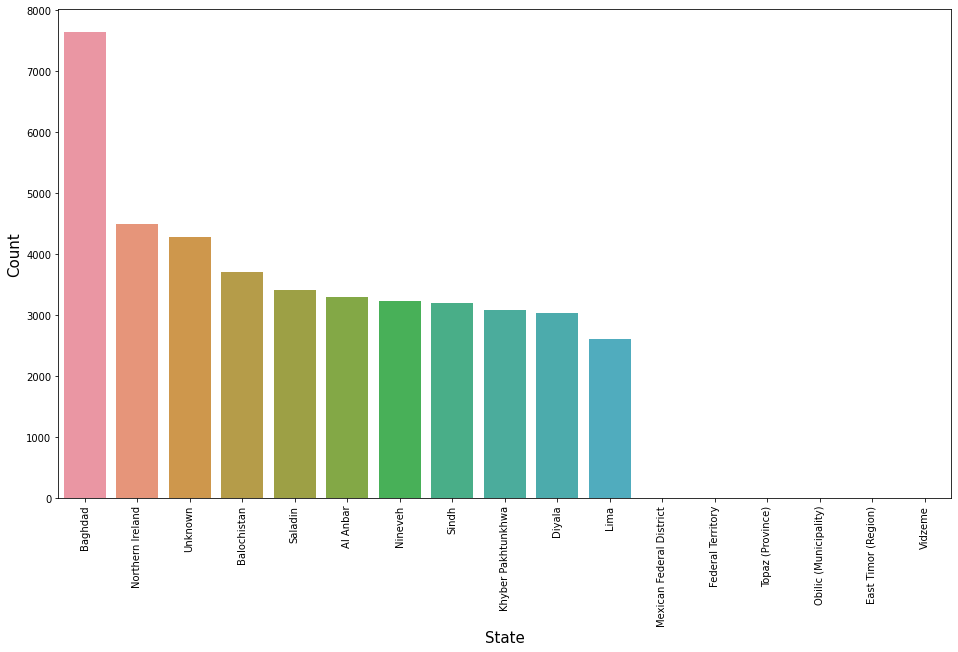

In [21]:
plt.figure(figsize=(16,9))
X = df_state.index
y = df_state.values
sns.barplot(X,y)
plt.xlabel("State",size=15)
plt.ylabel("Count",size=15)
plt.xticks(rotation=90)
plt.show()

<b> As we can see, the maximum number of attacks took place in Baghdad, followed by Northern Ireland and least took place in Vidzeme. 

#### City-wise attacks(Top 10 and bottom 5 Cities)

In [22]:
df_city = df["city"].value_counts().drop(df["city"].value_counts().index[11:-6]).drop('Unknown')

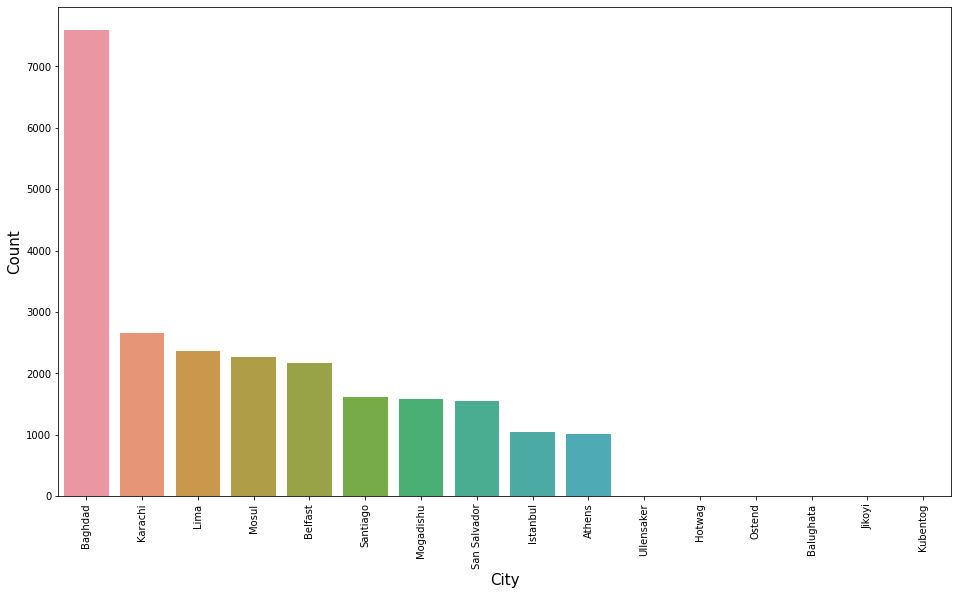

In [23]:
plt.figure(figsize=(16,9))
X = df_city.index
y = df_city.values
sns.barplot(X,y)
plt.xlabel("City",size=15)
plt.ylabel("Count",size=15)
plt.xticks(rotation=90)
plt.show()

<b> As we can see, the maximum number of attacks took place in Baghdad, followed by Karachi and least took place in Kubentog. 

#### Main Targeted areas

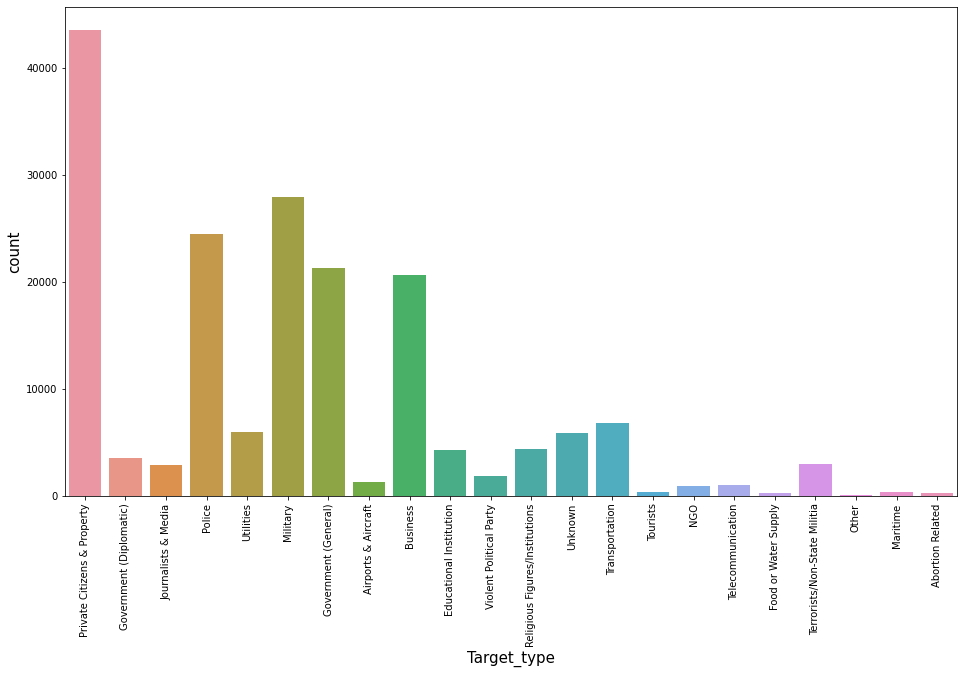

In [24]:
plt.figure(figsize=(16,9))
plt.xlabel("Target Types",size=15)
plt.ylabel("Count",size=15)
plt.xticks(rotation=90)
sns.countplot(x="Target_type",data=df)
plt.show()

<b> As we can see, during the terrorist attacks, common people and their properties are most affected

#### Killed and Wounded according to regions

In [25]:
reg_killed = df[["Region","Killed"]].groupby("Region").sum().sort_values(by='Killed',ascending=False)

In [26]:
reg_wounded = df[["Region","Wounded"]].groupby("Region").sum().sort_values(by='Wounded',ascending=False)

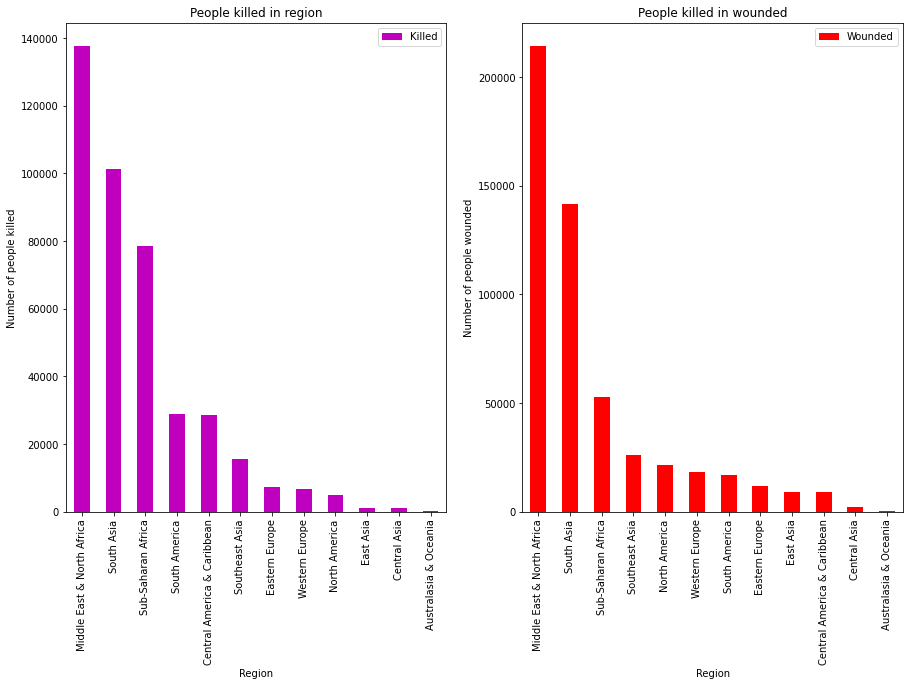

In [27]:
reg_killed.plot(kind='bar',figsize=(15,9),ax=plt.subplot(1,2,1),ylabel='Number of people killed',
                title='People killed in region',color='m')
reg_wounded.plot(kind='bar',figsize=(15,9),ax=plt.subplot(1,2,2),ylabel='Number of people wounded',
                 title='People killed in wounded',color='r')
plt.show()

<b> As we can see, more due to large number of terrorist attacks in Middle East and North Africa region, more than 120000 people have been killed while more than 2 lacs have been injured.

In [28]:
df.head()

,Event_ID,Year,Month,Day,Country,Region,state,latitude,longitude,Success,suicide,AttackType,Target_type,Target,Killed,Wounded,city,Weapon_type,Group
0,197000000001,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,18.456792,-69.951164,1,0,Assassination,Private Citizens & Property,Julio Guzman,1.0,0.0,Santo Domingo,Unknown,MANO-D
1,197000000002,1970,0,0,Mexico,North America,Federal,19.371887,-99.086624,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),"Nadine Chaval, daughter",0.0,0.0,Mexico city,Unknown,23rd of September Communist League
2,197001000001,1970,1,0,Philippines,Southeast Asia,Tarlac,15.478598,120.599741,1,0,Assassination,Journalists & Media,Employee,1.0,0.0,Unknown,Unknown,Unknown
3,197001000002,1970,1,0,Greece,Western Europe,Attica,37.997490,23.762728,1,0,Bombing/Explosion,Government (Diplomatic),U.S. Embassy,NaN,NaN,Athens,Explosives,Unknown
4,197001000003,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,1,0,Facility/Infrastructure Attack,Government (Diplomatic),U.S. Consulate,NaN,NaN,Fukouka,Incendiary,Unknown


#### Attack Type

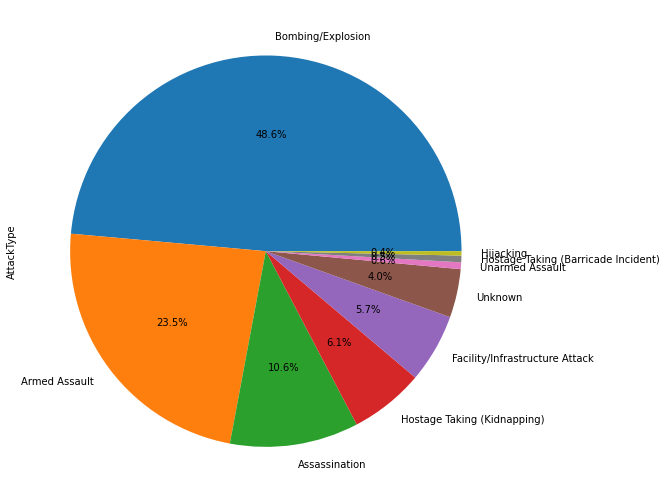

In [29]:
df['AttackType'].value_counts().plot(kind='pie',figsize=(15,9),autopct="%1.1f%%",radius=1)
plt.show()

<b> We can conclude that most attacks take place through bombing/explosion followed by Armed assault

#### Groups behind the attack

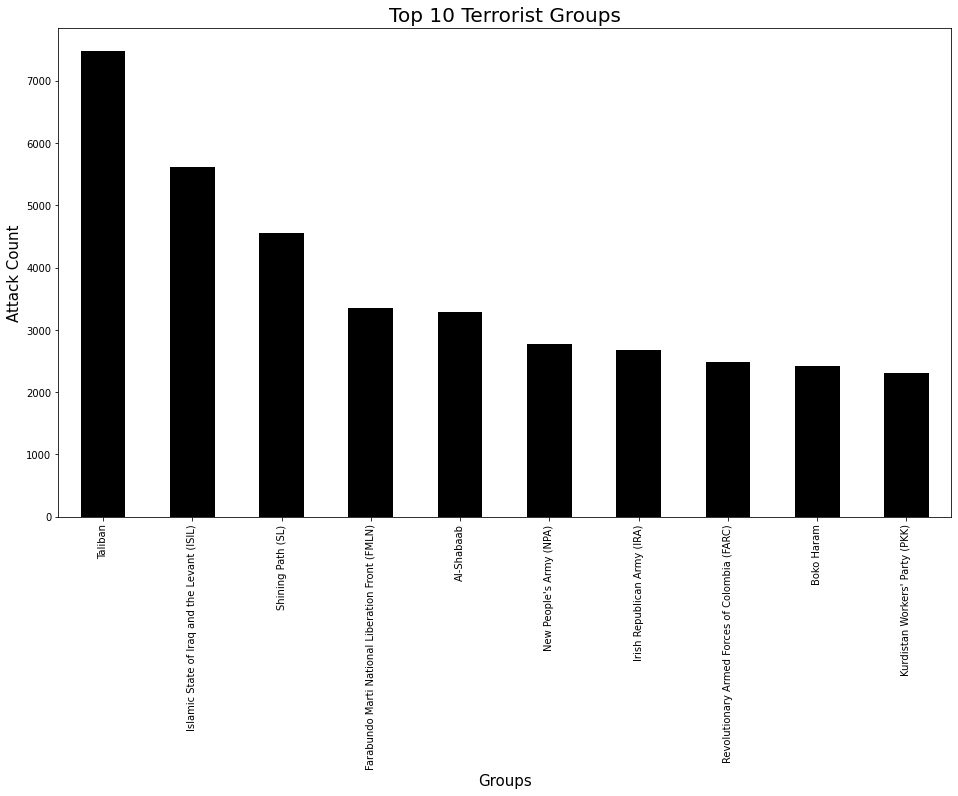

In [30]:
df['Group'].value_counts().drop('Unknown').head(10).plot(kind='bar',color='black',figsize=(16,9))
plt.title("Top 10 Terrorist Groups",size=20)
plt.xlabel("Groups",size=15)
plt.ylabel("Attack Count",size=15)
plt.show()

<b> As we can see, Taliban is responsible for most of the attacks followed by Islamic State of Iraq and the Levant(ISIL)

## Conclusions
- The region "Middle East & North Africa" has had the maximum terror attacks.
- The country affected the most is Iraq.
- The city affected the most is Baghdad.
- The most used attack type was Bombing/Explosion.
- Taliban has carried out maximum attacks.
- Private Citizens and property are the most common targets.
## Thus the hot zone of terrorism is "Middle East & North Africa" followed by "South Asia"

# Thank You